import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [50]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [51]:
dataset = r'D:/tryout/Dataset'
imagePaths = list(paths.list_images(dataset))

In [52]:
imagePaths

['D:/tryout/Dataset\\facemask\\00000_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00001_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00002_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00003_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00004_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00005_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00006_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00007_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00008_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00009_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00010_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00011_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00012_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00013_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00014_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00015_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00016_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00017_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00018_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00019_Mask.jpg',
 'D:/tryout/Dataset\\facemask\\00020_Mas

In [53]:
data = []
labels = []

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [54]:
data

[array([[[-0.9843137 ,  0.05098045,  0.1686275 ],
         [-1.        , -0.00392157,  0.12941182],
         [-1.        ,  0.01176476,  0.12156868],
         ...,
         [-0.99215686, -0.06666666,  0.21568632],
         [-1.        , -0.09803921,  0.19215691],
         [-1.        , -0.09019607,  0.1686275 ]],
 
        [[-0.99215686,  0.0196079 ,  0.1686275 ],
         [-1.        , -0.00392157,  0.12941182],
         [-1.        ,  0.01176476,  0.13725495],
         ...,
         [-1.        , -0.11372548,  0.17647064],
         [-1.        , -0.11372548,  0.17647064],
         [-1.        , -0.10588235,  0.17647064]],
 
        [[-1.        ,  0.0196079 ,  0.14509809],
         [-0.9843137 ,  0.01176476,  0.12941182],
         [-1.        , -0.00392157,  0.09803927],
         ...,
         [-1.        , -0.12156862,  0.1686275 ],
         [-0.99215686, -0.11372548,  0.18431377],
         [-0.99215686, -0.11372548,  0.20000005]],
 
        ...,
 
        [[-0.8352941 ,  0.19215691

In [55]:
labels

['facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',
 'facemask',

In [56]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [57]:
data

array([[[[-0.9843137 ,  0.05098045,  0.1686275 ],
         [-1.        , -0.00392157,  0.12941182],
         [-1.        ,  0.01176476,  0.12156868],
         ...,
         [-0.99215686, -0.06666666,  0.21568632],
         [-1.        , -0.09803921,  0.19215691],
         [-1.        , -0.09019607,  0.1686275 ]],

        [[-0.99215686,  0.0196079 ,  0.1686275 ],
         [-1.        , -0.00392157,  0.12941182],
         [-1.        ,  0.01176476,  0.13725495],
         ...,
         [-1.        , -0.11372548,  0.17647064],
         [-1.        , -0.11372548,  0.17647064],
         [-1.        , -0.10588235,  0.17647064]],

        [[-1.        ,  0.0196079 ,  0.14509809],
         [-0.9843137 ,  0.01176476,  0.12941182],
         [-1.        , -0.00392157,  0.09803927],
         ...,
         [-1.        , -0.12156862,  0.1686275 ],
         [-0.99215686, -0.11372548,  0.18431377],
         [-0.99215686, -0.11372548,  0.20000005]],

        ...,

        [[-0.8352941 ,  0.19215691,  0

In [58]:
labels

array(['facemask', 'facemask', 'facemask', ..., 'nomask', 'nomask',
       'nomask'], dtype='<U8')

In [59]:
#perform onehot encoding
lb = LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [60]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [61]:
train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [62]:
train_X

array([[[[ 0.5921569 ,  0.21568632,  0.01176476],
         [ 0.56078434,  0.12941182, -0.1607843 ],
         [ 0.69411767,  0.5137255 ,  0.427451  ],
         ...,
         [ 0.27058828,  0.3803922 ,  0.4039216 ],
         [ 0.2941177 ,  0.39607847,  0.427451  ],
         [ 0.2941177 ,  0.4039216 ,  0.427451  ]],

        [[ 0.47450984,  0.00392163, -0.26274508],
         [ 0.427451  , -0.06666666, -0.40392154],
         [ 0.4431373 , -0.03529412, -0.35686272],
         ...,
         [ 0.27843142,  0.3803922 ,  0.427451  ],
         [ 0.2941177 ,  0.38823533,  0.41960788],
         [ 0.30196083,  0.41176474,  0.43529415]],

        [[ 0.45098042,  0.04313731, -0.27843136],
         [ 0.54509807,  0.22352946, -0.04313725],
         [ 0.48235297,  0.20000005,  0.04313731],
         ...,
         [ 0.27843142,  0.39607847,  0.41176474],
         [ 0.3176471 ,  0.4039216 ,  0.43529415],
         [ 0.32549024,  0.41176474,  0.4431373 ]],

        ...,

        [[ 0.6156863 ,  0.26274514,  0

In [63]:
train_X.shape

(1560, 224, 224, 3)

In [64]:
train_Y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [65]:
train_Y.shape

(1560, 2)

In [66]:
aug=ImageDataGenerator(rotation_range=20,
                       zoom_range=0.15,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.15,
                       horizontal_flip=True,
                       fill_mode='nearest')

In [67]:
aug

In [68]:
base_Model=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [69]:
base_Model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [70]:
headModel=base_Model.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=base_Model.input,outputs=headModel)

In [71]:
for layer in base_Model.layers:
    layer.trainable=False

In [72]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [79]:
learning_rate=1e-4
Epochs=20
BS=32

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


#model.save(r'C:\Python37\Projects\face-mask-detector\mobilenet_v2.model')
#model.save(r'D:\tryout\mobilenet_v2.model')

model.save(r'D:/tryout/mobilenet_v2.model')

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
48/48 [==============================] - 41s 825ms/step - loss: 0.0161 - accuracy: 0.9980 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/20
48/48 [==============================] - 41s 859ms/step - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/20
48/48 [==============================] - 39s 816ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/20
48/48 [==============================] - 40s 825ms/step - loss: 0.0101 - accuracy: 0.9980 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/20
48/48 [==============================] - 39s 821ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/20
48/48 [==============================] - 40s 826ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 7.4059e-04 - val_accuracy: 1.0000
Epoch 7/20
48/48 [==============================] - 40s 834ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 8.6604e-04 - val_accuracy

In [80]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

    facemask       1.00      1.00      1.00       190
      nomask       1.00      1.00      1.00       200

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



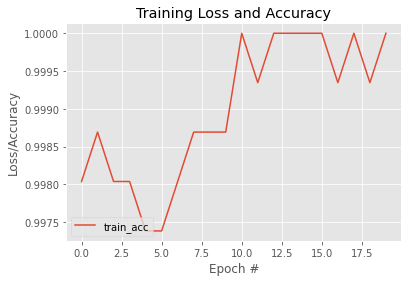

In [87]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["value_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("train_plot.png")

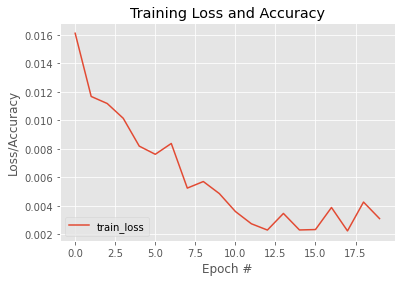

In [88]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("train_loss_plot.png")

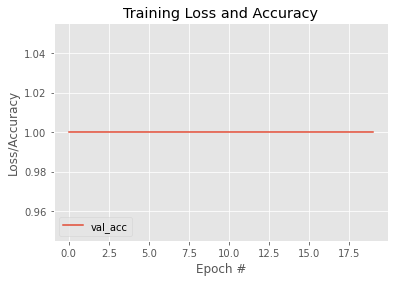

In [91]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("val_acc_plot.png")

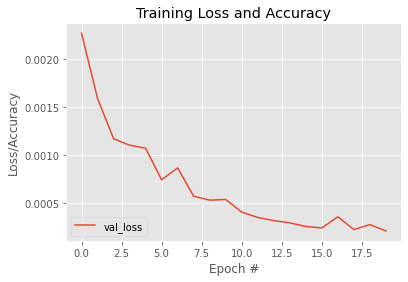

In [90]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
#plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("val_loss_plot.png")

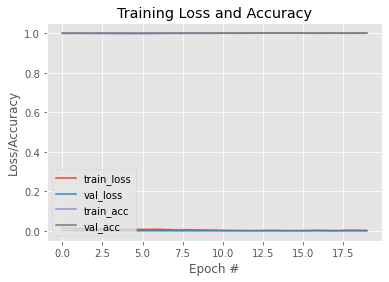

In [86]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")